# Welcome to the Machine Learning in Python Tutorial

## What's in scope for this morning?
The machine learning pipeline for predictive modeling
1. Exploratory data analysis
2. Preprocessing data for ML
3. Training a model
    1. Logistic Regression
    2. MultiLayer Perceptron (NN)
4. Using a model for predictions

## What's _not_  in scope this morning?
1. Different machine learning packages (TensorFlow, Keras, PyTorch, MXNet)
2. Image Recognition
3. Unsupervised learning (word embeddings, clustering, text generation)
4. That one blog you read about sheep and self-driving cars

### Python Libraries

Python libraries are collections of functions and methods that allow you to avoid "reinventing the wheel". The more you use python, the more familiar you become with the libraries that are available. Throughout today, we will be accessing numerous libraries by first importing them and then referencing their methods.

In [1]:
# get the current working directory
import os
os.getcwd()

'/Users/jamie.brandon/PycharmProjects/machine-learning-in-python'

In [2]:
# get a vector of zeros of length 5
import numpy as np
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [3]:
# roll the dice
from random import randint
randint(1,6)

2

Note that if i keep running the above cell, jupyter knows that `randint()` is already imported and does not keep re-importing it.

It is best practice to put all imports at the begining of a file when not using notebooks

# No compiling allowed: Python as a scripting language

One of the cool things about Python is that it supports many (if not all) types of programming. Despite Python being known as a "scripting language", it is object-oriented. When doing complex machine learning, we heavily rely on objects to store and manage the multitude of data, model parts, and results. This morning, we will be doing a lot of scripting and procedural programming, but we will also be using objects from the python library (i.e dataframes). In the afternoon (and those joining us for Day 2), we will focus more on creating our own objects. While working today, keep in mind that all of this code could be written in a more object-oriented fashion based on the needs of the program.

# What is Machine Learning?
The collection of algorithms that train models that can make predictions, create a vector space, or other useful structure. We do not tell the models what to do, they learn through trial and error


# What is AI?
At Callminer: How to market machine learning ;)

In the real world: Machine Learning is a subset of Artifical Intelligence. According to DeepAI, AI is 
>"intelligence of machines and computer programs, versus natural intelligence, which is intelligence of humans and animals."

AI is the process of using algorithms to solve tasks. This includes rules based approaches as well as ML algorithms.


![https://interestingengineering.com/whats-the-difference-between-machine-learning-and-ai](figures/ai_vs_ml.jpg)

image from [here](https://interestingengineering.com/whats-the-difference-between-machine-learning-and-ai)

Learn more about [ai vs machine learning](https://towardsdatascience.com/clearing-the-confusion-ai-vs-machine-learning-vs-deep-learning-differences-fce69b21d5eb)


# The Pipeline

To get a better understanding of where we are doing, let's look at the machine learning pipeline.
The pipeline for classification tasks in machine learning is:

1. Define the problem
2. Gather Data
3. Exploratory Data Analysis
4. Clean the Data
5. Engineer Additional Features
6. Prepare Features for ML
7. Train a Model
8. Predict
9. Refine the model


# Define the Problem

Given information about a particular Game of Thrones episode and a line of dialogue, predict who said it.



For example: In Season 6, Episode 5, who said "Hold the Door"?

# Gather Your Data

### "Transcripts"

Normally, when we make models here at CallMiner, we focus heavily on the transcripts of calls. These transcripts are broken into turns that contain turn-specific information, like who said it and when it was said. Unfortunately, we don't have quality call data to use as examples today. However, we do have Game of Thrones dialogue.

In [4]:
# create a dataframe from a csv of data
import pandas as pd
transcript_path = os.path.join("data", "got_scripts_breakdown.csv")
transcripts = pd.read_csv(transcript_path, index_col = "Column1", encoding = "utf8", delimiter = ";")
transcripts.head(5)

,Season,Episode,Sentence,Name,N_serie,N_Season,Emision Date
Column1,,,,,,,
0,Season 1,winter is coming,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,17/04/2011
1,Season 1,winter is coming,I’ve never seen wildlings do a thing like this...,will,1,1,17/04/2011
2,Season 1,winter is coming,Close as any man would,will,1,1,17/04/2011
3,Season 1,winter is coming,Do the dead frighten you?,royce,1,1,17/04/2011
4,Season 1,winter is coming,Our orders were to track the wildlings We trac...,gared,1,1,17/04/2011


### Metadata

Although we are often looking at calls on a turn basis, it helps to add information about the overall call in the models. For example, if we are prediciting whether or not a turn contains PII, it could be helpful to know which department took the call. Therefore, we also need call-level metadata. For our Game of Thrones example, this would be episode-level metadata.

_Task_ : create a dataframe named `metadata` of episode meta data located as `data\got_csv.csv`. Let the index_col be set to default. Display the first season of metadata.


In [5]:
# add code here
metadata_path = os.path.join("data", "got_csv.csv")
metadata = pd.read_csv(metadata_path,  encoding = "utf8")
metadata.head(10)

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20,56,"While Bran recovers from his fall, Ned takes o...",21256,8.8,3
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44,58,Lord Stark and his daughters arrive at King's ...,20090,8.7,0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45,56,Eddard investigates Jon Arryn's murder. Jon be...,19123,8.8,1
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58,55,Catelyn has captured Tyrion and plans to bring...,20062,9.1,5
5,1,6,6,A Golden Crown,Daniel Minahan,Story by : Jane Espenson and David Benioff & D...,"May 22, 2011",2.44,53,"While recovering from his battle with Jaime, E...",19908,9.2,4
6,1,7,7,You Win or You Die,Daniel Minahan,David Benioff & D. B. Weiss,"May 29, 2011",2.40,58,Robert has been injured while hunting and is d...,20405,9.3,2
7,1,8,8,The Pointy End,Daniel Minahan,George R. R. Martin,"June 5, 2011",2.72,59,Eddard and his men are betrayed and captured b...,18688,9.1,7
8,1,9,9,Baelor,Alan Taylor,David Benioff & D. B. Weiss,"June 12, 2011",2.66,57,Robb goes to war against the Lannisters. Jon f...,26364,9.6,2
9,1,10,10,Fire and Blood,Alan Taylor,David Benioff & D. B. Weiss,"June 19, 2011",3.04,53,"With Ned dead, Robb vows to get revenge on the...",23354,9.5,3


Now we want to join the two dataframes so that each dialogue turn contains the episode metadata for which it was spoken.

In [6]:
# joing the two dataframes to create one dataframe, `data`
data=pd.merge(transcripts, metadata, left_on="N_serie", right_on="Episode Number",how="left")
data.head(3)

,Season_x,Episode,Sentence,Name,N_serie,N_Season,Emision Date,Season_y,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
0,Season 1,winter is coming,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,17/04/2011,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
1,Season 1,winter is coming,I’ve never seen wildlings do a thing like this...,will,1,1,17/04/2011,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
2,Season 1,winter is coming,Close as any man would,will,1,1,17/04/2011,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4


*Discussion*: What do you notice about `data`? Why did it do that? How could it have been avoided?

# Features and Instances

From this point forward, we will be thinking of our dataframe in terms of *instances* and *features*. 


### Features
Each column represents a feature. [Wikipedia](https://en.wikipedia.org/wiki/Feature_(machine_learning)) defined it the best :
> In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon being observed. Choosing informative, discriminating and independent features is a crucial step for effective algorithms in pattern recognition, classification and regression. 

We will work with *numerical*, *categorical*, and *text* features:


1. Numerical features: features that are numbers
    1. Discrete: numerical values that are integers (age in years)
    2. Continuous: numerical values that can be any type of number (velocity)
    
2. Categorical features: feature value is chosen from a small group of possible options (college major)

3. Text features: these features include strings that are extremely unique to a given instance (summary)

The features tell us everything we know about the data we are predicting on. 
    

### Instances

Each row represents an instance. An instance is a singular unit of data. Our goal is that the model will be able to predict the correct label given the features from the instance. In our example, each line of spoken dialogue is a unique instance and each instance has a value for each feature.

# Exploratory Data Analysis

Exploratory Data Analysis is the process of analyzing your data in order to understand its main chatacteristics. It's like:
1. Reading the ingredients before taking a bite of a mystery nugget. 
2. Running a background check before a blind date


It goes back to knowing what you are getting yourself into before you dive in

### Survey the Data

In [7]:
# What even are the features?
list(data)

['Season_x',
 'Episode',
 'Sentence',
 'Name',
 'N_serie',
 'N_Season',
 'Emision Date',
 'Season_y',
 'Episode Number',
 'Number in Season',
 'Episode Name',
 'Director',
 'Writer',
 'Original Air Date',
 'US viewers (million)',
 'Runtime (mins)',
 'IMDB Description',
 'IMDB votes',
 'Imdb Rating',
 'Notable Death Count']

In [8]:
# What are run times?
list(data["Runtime (mins)"]) 

[62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,


In [9]:
# not per instance, per episode!
list(metadata["Runtime (mins)"])

[62,
 56,
 58,
 56,
 55,
 53,
 58,
 59,
 57,
 53,
 53,
 54,
 53,
 51,
 55,
 54,
 56,
 54,
 55,
 64,
 55,
 56,
 56,
 53,
 57,
 53,
 58,
 56,
 51,
 63,
 58,
 52,
 57,
 55,
 53,
 51,
 51,
 52,
 51,
 65,
 53,
 56,
 60,
 51,
 57,
 54,
 59,
 61,
 52,
 60,
 50,
 54,
 52,
 59,
 57,
 52,
 51,
 59,
 60,
 68,
 59,
 59,
 63,
 50,
 59,
 70,
 80]

In [10]:
# What are the unique run times?
set(metadata["Runtime (mins)"])


{50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 70, 80}

In [11]:
# how many times do each of these runtimes occur?
from collections import Counter
runtimes = Counter(metadata["Runtime (mins)"])
runtimes

Counter({62: 1,
         56: 7,
         58: 4,
         55: 5,
         53: 8,
         59: 7,
         57: 5,
         54: 5,
         51: 7,
         64: 1,
         63: 2,
         52: 5,
         65: 1,
         60: 3,
         61: 1,
         50: 2,
         68: 1,
         70: 1,
         80: 1})

In [12]:
# How many times does someone say "you know nothing"?
know_nothings = [line for line in data["Sentence"] if "you know nothing" in line.lower()]
len(know_nothings)

7

*Task*: Explore other fields in the data. What are the values? How often do they occur? Is anything weird happening?

In [13]:
# add code here!

### Visualize distributions

Although counts and lists are useful, it is often helpful to look at how features are distributed. Python has a variety of plotting packages to help with this task

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


(array([14., 18., 16., 11.,  4.,  1.,  2.,  0.,  0.,  1.]),
 array([50., 53., 56., 59., 62., 65., 68., 71., 74., 77., 80.]),
 <a list of 10 Patch objects>)

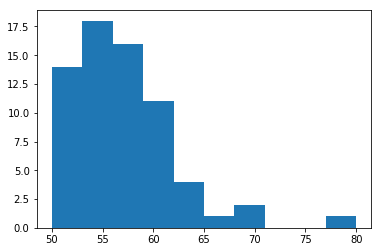

In [15]:
# plot a histogram of runtimes
plt.hist(metadata["Runtime (mins)"])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

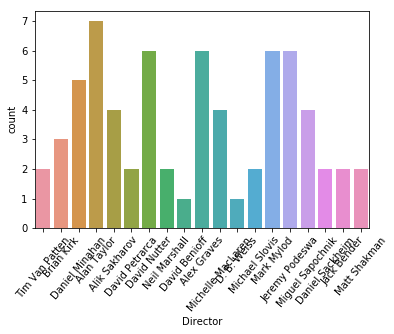

In [16]:
# plot a count plot of episodes per director
sns.countplot(metadata["Director"])
plt.xticks(rotation = 50)


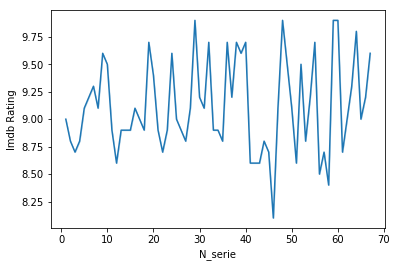

In [17]:
# plot a line graph of IMDB ratings for each episode
sns.lineplot(x = data["N_serie"],y = data["Imdb Rating"])

Task: Pick some interesting features, and visualize their distribution! Anything strange? Anything cool? Find any correlations?
(Pro Tip: pyplot and seaborn have gremlins. For time constraints, try to stick with one of the sample graphs we've provided! However here is the documentation for [matplot lib](https://matplotlib.org/gallery/index.html) and [seaborn](https://seaborn.pydata.org/examples/index.html) )

In [18]:
# add graph here

# Clean the Data
if you've asked us anything about how much data is enough, we almost always respond "as much as you can get!". However, the data needs to be as "clean" as possible. What does that even mean?
Clean data:
1. Not dirty

So what is dirty data: 
1. Missing values
2. Inaccurate values
3. Irrelevant information
4. It is in a format that machine learning algorithms won't accept

Although some machine learning algorithms are great at sifting through the garbage to find important features, it's nice if we help along the way. A good thought to keep in mind: "Would knowing this information help _me_ predict the answer?"

### Marie Kondo the features --> What brings you joy?

There are certain types of features that we like as data scientists. These features are easy for algorithms to use OR it is easy for us to transform them into formats algorithms can use.



#### Features that bring me joy?
1. RELEVANT continuous and discrete data 
    1. heights in cm
    2. distances
    3. words per minute
    4. NPS score
2. Categorical data with a reasonable number of categories
    1. state
    2. agent
    3. reason for call
        
#### Features that do not bring me joy?
1. Unprocessed text
    1. Transcripts
    2. Comments
2. Redundant features
    1. DOB and Birth_date
    2. Product Name and Product ID
3. Categorical features with too many unique values
    1. ANI
    2. Last Name

[What makes a good feature-video](https://www.youtube.com/watch?v=N9fDIAflCMY)

Task: Look at your columns and create a list of column names for the columns that do not bring you joy. Assign this list to the variable `to_be_removed`. Do NOT remove `Sentence` nor `Name`. We need them later.

Ex: `to_be_removed = ["ANI", "Last Name", "DOB"...]`

In [19]:
# add list here

In [20]:
to_be_removed = ['Season_x', 
                'Episode', 
                'Emision Date', #dates can be split into categorical variables but we have no time today 
                'Season_y', 
                'Episode Number', 
                'Episode Name', 
                'Original Air Date', 
                'IMDB Description']

In [21]:

# remove columns that contain bad features

# if you like keeping a back_up before deleting
# Note: if something does get messed up, you can always rerun all the cells from the beginning
back_up_data_1 = data.copy()

data.drop(to_be_removed, axis = 1, inplace = True)
    
data.head(3)

,Sentence,Name,N_serie,N_Season,Number in Season,Director,Writer,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count
0,What d’you expect? They’re savages One lot ste...,waymar royce,1,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,4
1,I’ve never seen wildlings do a thing like this...,will,1,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,4
2,Close as any man would,will,1,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,4


### Fix Inconsistencies
Until the robots finally take our jobs, much of data collection and data entry is still done by hand. And WE'RE ONLY HUMAN! (I can't imagine how many typos and syntax errors have already occured by now if you're experiencing this live). Therefore, data can be inconsistent-- whether it be spelling errors, missing values, changes in format, etc. Before creating a model, it is important that we find any inconsistencies with our data.

In [22]:
# Who were the unique writers on Game of Thrones?
writers = set(data["Writer"])
writers

{'Bryan Cogman',
 'Dave Hill',
 'David Benioff & D. B. Weiss',
 'David Benioff\xa0& D. B. Weiss',
 'David Benioff\xa0&\xa0D. B. Weiss',
 'George R. R. Martin',
 'Story by\u200a: Jane Espenson\xa0and David Benioff & D. B. Weiss\xa0',
 'Vanessa Taylor'}

 We want our model to recognize a unique list of writers (Cogman, Hill, Weiss, Benioff, Martin, Espenson, Taylor). Instead of seing 'David Benioff & D.B Weiss' as one new author, we want it to recognize that it is author 'David Benioff' AND author 'D.B. Weiss'. We aren't going to fix this right now BUT we will fix it very soon. Don't forget about it!
 

Task: What other important column is full of typos? Find it!

In [23]:
# add code here
alphabetical_characters = sorted(set(str(name) for name in data["Name"]))
print(len(alphabetical_characters))
alphabetical_characters[:14]

610


['a voice',
 'a younger melara',
 'addam marbrand',
 'aemon',
 'aeron',
 'aerson',
 'ahsa',
 'all',
 'all three',
 'all together',
 'alliser',
 'alliser thorn',
 'alliser thorne',
 'alliser throne']

There are at least 4 ways that `alliser thorne` is referenced but that is the same person! Not good if our model is trying to predict who said a particular line. We don't want the model deciding between `alliser thorn` and `alliser thorne`! Therefore, we need to fix these so there is one unique name for each character.


In [24]:
# replace `alliser thorn` with `alliser thorne` 
data.replace({'Name': 'alliser thorn'},'alliser thorne', inplace = True)

What we would have to do: find all the instances where a character was referenced different ways and change it to one reference

What I did for you: that.

Earlier, we mentioned that you can import python libraries, which are packages of code. Turns out you can also import methods and objects that you have in other files. This makes data cleaning much easier because once you write it once, you can reuse it.

In [25]:
from tutorial_utils import NamesToReplace
nTR=NamesToReplace()
nTR.names

[('missandei', 'mereen missandei'),
 ('alliser', 'alliser thorne'),
 ('alliser thorn', 'alliser thorne'),
 ('alliser throne', 'alliser thorne'),
 ('alliser', 'alliser thorne'),
 ('robin', 'robin arryn'),
 ('tanner', 'karl tanner'),
 ('beric', 'beric dondarrion'),
 ('priestess', 'red priestess'),
 ('hodor', 'hodor luwin'),
 ('watch brother', 'nights watch brother'),
 ('owner', 'slave owner'),
 ('ersei', 'cersei'),
 ('yohn', 'yohn royce'),
 ('sandor', 'sandor clegane'),
 ('lollys', 'lollys stokeworth'),
 ('kraznys', 'kraznys mo nakloz'),
 ('lysa', 'lysa arryn'),
 ('mordane', 'septa mordane'),
 ('buyer', 'slave buyer'),
 ('olenna', 'lady olenna'),
 ('red priest', 'red priestess'),
 ('drogo', 'khal drogo'),
 ('roose', 'roose bolton'),
 ('yarwyck', 'othell yarwyck'),
 ('yarwick', 'othell yarwick'),
 ('janos', 'janos slunt'),
 ('aemon', 'maester aemon'),
 ('pie', 'hot pie'),
 ('sparrow', 'high sparrow'),
 ('wolkan', 'maester wolkan'),
 ('bron', 'bronn'),
 ('meryn', 'meryn trant'),
 ('maester

Task: Write code that loops through the names in `nTR` and replaces them in `data` as we did with allister. How many characters do we have left?

In [26]:
# add code here
for old_name, new_name in nTR.names:
    data.replace({'Name': old_name},new_name, inplace = True)
len(set(str(name) for name in data["Name"]))

400

We still have a TON of characters, many who don't say much

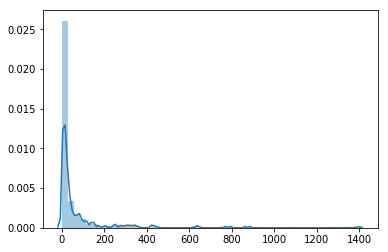

In [27]:
# graph distribution of counts of characters
import seaborn as sns
from collections import Counter
character_counts = Counter(data["Name"])
sns.distplot(list(character_counts.values()))

We have a ton of characters who don't say hardly anything and then it is pretty even. We want to count those characters as "other"

In [28]:
 # Get a list of all characters who spoke less than 30 times
cut_off = 30 # hate mystery numbers
extra_characters = [str(character) 
                  for character in character_counts if character_counts[character] < cut_off ]
len(extra_characters)

295

Task: Replace all those character names with "other"

In [29]:
# add code here
for character in extra_characters:
    data.replace({'Name': character}, "other", inplace = True)

In [30]:
# Who's left?
important_characters = set([character for character in data["Name"] if character is not "other"])
important_characters

{'alliser thorne',
 'arya',
 'balon',
 'barristan selmy',
 'beat waif',
 'benjen',
 'beric dondarrion',
 'bran',
 'brienne',
 'bronn',
 'brynden',
 'catelyn',
 'cersei',
 'daario naharis',
 'daenerys',
 'davos',
 'doreah',
 'eddark',
 'edmure',
 'ellaria',
 'euron',
 'gendry',
 'gilly',
 'grenn',
 'grey worm',
 'guard',
 'high sparrow',
 'hizdahr zo loraq',
 'hodor',
 'hot pie',
 'jamie',
 'janos slunt',
 'jaqen',
 'jeor',
 'joffrey',
 'john royce',
 'jojen',
 'jon',
 'jorah',
 'jory cassel',
 'karl tanner',
 'kevan',
 'lady crane',
 'lady olenna',
 'lancel',
 'littlefinger',
 'locke',
 'loras',
 'lyanna',
 'lysa arryn',
 'mace',
 'maester aemon',
 'maester luwin',
 'maester pycelle',
 'man',
 'mance',
 'margaery',
 'marwyn',
 'meera',
 'melisandre',
 'men',
 'mereen missandei',
 'myranda',
 nan,
 'ned stark',
 'oberyn',
 'olyvar',
 'orell',
 'osha',
 'podrick',
 'pyp',
 'qhorin',
 'qyburn',
 'ramsay',
 'ray',
 'renly',
 'rickard kar',
 'robb',
 'robert',
 'robin arryn',
 'roose bolton

# Preparing data for ML 

Features must be represented in a way that a computer can understand and _learn_ from. We do this through one-hot coding and normalizing.


### One-hot Encodings of Categorical Data

One-hot encoding is how we turn categorical data into zeros and ones.
![one-hot-encoding](figures/one_hot_encoding.png)

One-hot encoding is necessary because the math used in machine learning algorithms requires all features to be numbers. One-hot coding provides a way to express membership within a group and lack of membership in the others.

As you see above, categorical features should be one-hot encoded. But when should discrete data be one-hot encoded? Let's think about the column "N_Season".... Does the fact that an episode is in season 4 mean that it is more _something_ than an episode in season 2? Does the fact that an episode had 4.4 million views tell you that it is more _something_ than an episode with 2.2 million views? If there is a relationship with how the discrete value increases or decreases, it should be treated like a number. If there is not, it should be one-hot-encoded.

Task: Create a list of column names for the columns that should be one-hot encoded. Assign this list to the variable `one_hots`. Ignore `Name` and `Sentence`

In [31]:
# add code here
one_hots = ["N_Season","Number in Season", "Director"]

In [32]:
# get the one-hot encoding for a column
one_hot_encoding = pd.get_dummies(data["Number in Season"], prefix = "Number in Season")
one_hot_encoding.tail(5)
 

,Number in Season_1,Number in Season_2,Number in Season_3,Number in Season_4,Number in Season_5,Number in Season_6,Number in Season_7,Number in Season_8,Number in Season_9,Number in Season_10
20254,0,0,0,0,0,0,1,0,0,0
20255,0,0,0,0,0,0,1,0,0,0
20256,0,0,0,0,0,0,1,0,0,0
20257,0,0,0,0,0,0,1,0,0,0
20258,0,0,0,0,0,0,1,0,0,0


In [33]:
# concatenate it to the current dataframe
data = pd.concat([data, one_hot_encoding], axis = 1)
data.head(2)

,Sentence,Name,N_serie,N_Season,Number in Season,Director,Writer,US viewers (million),Runtime (mins),IMDB votes,...,Number in Season_1,Number in Season_2,Number in Season_3,Number in Season_4,Number in Season_5,Number in Season_6,Number in Season_7,Number in Season_8,Number in Season_9,Number in Season_10
0,What d’you expect? They’re savages One lot ste...,other,1,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,...,1,0,0,0,0,0,0,0,0,0
1,I’ve never seen wildlings do a thing like this...,other,1,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,...,1,0,0,0,0,0,0,0,0,0


In [34]:
# remove the original column
data.drop(["Number in Season"], axis = 1, inplace=True)
data.head(5)

,Sentence,Name,N_serie,N_Season,Director,Writer,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,...,Number in Season_1,Number in Season_2,Number in Season_3,Number in Season_4,Number in Season_5,Number in Season_6,Number in Season_7,Number in Season_8,Number in Season_9,Number in Season_10
0,What d’you expect? They’re savages One lot ste...,other,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,...,1,0,0,0,0,0,0,0,0,0
1,I’ve never seen wildlings do a thing like this...,other,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,...,1,0,0,0,0,0,0,0,0,0
2,Close as any man would,other,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,...,1,0,0,0,0,0,0,0,0,0
3,Do the dead frighten you?,other,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,...,1,0,0,0,0,0,0,0,0,0
4,Our orders were to track the wildlings We trac...,other,1,1,Tim Van Patten,David Benioff & D. B. Weiss,2.22,62,27685,9.0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
# since we already did encoding for "Number in Season", remove it from your list
one_hots.remove("Number in Season")
one_hots

['N_Season', 'Director']

In [36]:
# write a loop to do it for the remaining columns
for column in one_hots:
        one_hot_encoding = pd.get_dummies(data[column], prefix = column)
        data = pd.concat([data,one_hot_encoding], axis = 1)
        data.drop([column], axis = 1, inplace = True)
data.head(2)

,Sentence,Name,N_serie,Writer,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,...,Director_David Petrarca,Director_Jack Bender,Director_Jeremy Podeswa,Director_Mark Mylod,Director_Matt Shakman,Director_Michael Slovis,Director_Michelle MacLaren,Director_Miguel Sapochnik,Director_Neil Marshall,Director_Tim Van Patten
0,What d’you expect? They’re savages One lot ste...,other,1,David Benioff & D. B. Weiss,2.22,62,27685,9.0,4,1,...,0,0,0,0,0,0,0,0,0,1
1,I’ve never seen wildlings do a thing like this...,other,1,David Benioff & D. B. Weiss,2.22,62,27685,9.0,4,1,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# use the function from tutorial_utils to one-hot encode the writers
from tutorial_utils import get_writers_one_hot
writers_one_hot = get_writers_one_hot(data["Writer"])
writers_one_hot.head(5)

,Writer_Bryan Cogman,Writer_George R. R. Martin,Writer_Vanessa Taylor,Writer_D. B. Weiss,Writer_Jane Espenson,Writer_Dave Hill,Writer_David Benioff
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1


_Discussion_: What is different about this one-hot?

_Task_: Concatenate to `data` and drop the original column

In [38]:
#add code here
data = pd.concat([data,writers_one_hot],axis=1)
data.drop(["Writer"],axis=1, inplace=True)

## Normalizing your data


Normalizing your data is when you transform numerical features so that they are between 0 and 1, inclusively. 

![https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range](figures/normalize.png)

We do this because many machine learning algorithms rely on multiplying the features with a matrix of weights to get a value. If the number of views range from 5,000,000, to 20,000,000 while the rating range from 7.0 to 9.0, that large number of viewing will have a bigger impact on the model, even though we really just want the ratio of one episode's views to another.

You can still have a good model without normalizing data. You will just have a harder (read: longer) time training.

In [39]:
# normalize the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
for column in list(data):
    try:
        x_scaled = min_max_scaler.fit_transform(data[column].to_frame())
        scaled_column = pd.DataFrame(x_scaled, columns = [column])
        data.drop([column], axis = 1, inplace = True)
        data = pd.concat([data, scaled_column], axis = 1)   
    except ValueError: #Can't normalize categorical or text features
        pass

data.tail(10)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return sel

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return sel

,Sentence,Name,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,...,Director_Miguel Sapochnik,Director_Neil Marshall,Director_Tim Van Patten,Writer_Bryan Cogman,Writer_George R. R. Martin,Writer_Vanessa Taylor,Writer_D. B. Weiss,Writer_Jane Espenson,Writer_Dave Hill,Writer_David Benioff
20249,Does that bother you?,sansa,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20250,You would have Youre the strongest person I know,sansa,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20251,I believe thats the nicest thing youve ever sa...,arya,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20252,"Well, dont get used to it Youre still very str...",sansa,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20253,I miss him,arya,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20254,"Me, too",sansa,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20255,Its a long way down,beric dondarrion,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20256,Yeah The crows keep telling me Ill get used to it,tormund,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20257,"I can see movement Watch, on the tree line",man,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20258,What is it?,man,1.0,1.0,1.0,0.182409,0.833333,0.090909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Choose Your Target Characters

Today, we want to focus on a binary classification, meaning that we want our model to only have to choose between two options. Therefore, instead of predicting who said a given line from a script, we will choose a target character and predict whether or not that character said a particular line.

In [40]:
# get the name and counts for the 10 most common characters (ones with the most lines)

from collections import Counter
characters = Counter(data["Name"])
characters.most_common(10)

[('other', 2085),
 ('tyrion', 1395),
 ('cersei', 885),
 ('jon', 863),
 ('daenerys', 793),
 ('jamie', 769),
 ('sansa', 640),
 ('arya', 638),
 ('sam', 448),
 ('davos', 429)]

_Task_: Choose your target character. The more lines the better. Set `target_character= <name string>`

In [41]:
# your code goes here
target_character = "jon"

Now we must create the feature `<target_column>` that is `1` if the character is the target and `0` if it is not. This is the feature we will be trying to predict

In [42]:
# create the target_column
target_column = f"is_{target_character}"
data[target_column] = 0
for i, row in data.iterrows():
    if data.at[i, "Name"] == target_character:
        data.at[i, target_column] = 1

data.head(20)

,Sentence,Name,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,...,Director_Neil Marshall,Director_Tim Van Patten,Writer_Bryan Cogman,Writer_George R. R. Martin,Writer_Vanessa Taylor,Writer_D. B. Weiss,Writer_Jane Espenson,Writer_Dave Hill,Writer_David Benioff,is_jon
0,What d’you expect? They’re savages One lot ste...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,I’ve never seen wildlings do a thing like this...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,Close as any man would,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,Do the dead frighten you?,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,Our orders were to track the wildlings We trac...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
5,You don’t think he’ll ask us how they died? Ge...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
6,Your dead men seem to have moved camp,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
7,They were here,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
8,See where they went,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
9,What is it?,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


## Feature Engineering
An important part of machine learning is deriving additional features about the data for the model to learn. This is called [feature engineering](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114). You do this by looking at your data and thinking, "what can i figure out that the machine may not?"
We will come back to parts of this section in order to improve our model. For now, we'll skip some.

### Deriving discrete or continuous features

In [43]:
# Create a discrete feature that marks the number of words in the sentence for each feature. 

data["Words in sentence"] = 0
for i, row in data.iterrows():
    sentence = data.at[i,"Sentence"]
    num_words = len(sentence.split())
    data.at[i, "Words in sentence"] = num_words
data.head(3)
    

,Sentence,Name,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,...,Director_Tim Van Patten,Writer_Bryan Cogman,Writer_George R. R. Martin,Writer_Vanessa Taylor,Writer_D. B. Weiss,Writer_Jane Espenson,Writer_Dave Hill,Writer_David Benioff,is_jon,Words in sentence
0,What d’you expect? They’re savages One lot ste...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,24
1,I’ve never seen wildlings do a thing like this...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,21
2,Close as any man would,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,5


In [44]:
# Normalize the column
x_scaled = min_max_scaler.fit_transform(data["Words in sentence"].to_frame())
scaled_column = pd.DataFrame(x_scaled, columns = ["Words in sentence"])
data.drop(["Words in sentence"], axis = 1, inplace = True)
data = pd.concat([data,scaled_column], axis = 1)   
data["Words in sentence"]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0        0.069486
1        0.060423
2        0.012085
3        0.012085
4        0.045317
5        0.039275
6        0.021148
7        0.006042
8        0.009063
9        0.006042
10       0.000000
11       0.009063
12       0.006042
13       0.015106
14       0.003021
15       0.045317
16       0.042296
17       0.012085
18       0.012085
19       0.006042
20       0.057402
21       0.018127
22       0.009063
23       0.012085
24       0.015106
25       0.012085
26       0.024169
27       0.027190
28       0.021148
29       0.042296
           ...   
20229    0.000000
20230    0.015106
20231    0.069486
20232    0.003021
20233    0.012085
20234    0.069486
20235    0.006042
20236    0.063444
20237    0.066465
20238    0.066465
20239    0.033233
20240    0.018127
20241    0.009063
20242    0.012085
20243    0.024169
20244    0.009063
20245    0.036254
20246    0.012085
20247    0.006042
20248    0.030211
20249    0.009063
20250    0.024169
20251    0.030211
20252    0.033233
20253    0

### Deriving categorical features

In [45]:
# create the features "previous speaker" and "next speaker" that tells the model 
# who spoke before this instance and who spoke after this instance
data["previous_speaker"] = None
data["next_speaker"] = None
for i, row in data.iterrows() :
    try:
        if data.at[i,"N_serie"] == data.at[i-1, "N_serie"] : #previous speaker in same episode
            data.at[i, f"previous_speaker"] = data.at[i-1, "Name"]
    except KeyError: #first index
        pass
    try:
        if data.at[i,"N_serie"] == data.at[i+1, "N_serie"] : #next speaker in same episode
            data.at[i, f"next_speaker"] = data.at[i+1, "Name"]
    except KeyError: #last index
        pass
data.head(5)

,Sentence,Name,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,...,Writer_George R. R. Martin,Writer_Vanessa Taylor,Writer_D. B. Weiss,Writer_Jane Espenson,Writer_Dave Hill,Writer_David Benioff,is_jon,Words in sentence,previous_speaker,next_speaker
0,What d’you expect? They’re savages One lot ste...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.069486,None,other
1,I’ve never seen wildlings do a thing like this...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.060423,other,other
2,Close as any man would,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.012085,other,other
3,Do the dead frighten you?,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.012085,other,other
4,Our orders were to track the wildlings We trac...,other,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0.045317,other,other


In [46]:
# We no longer need the name column
data.drop(["Name"], axis=1, inplace=True)

_Task_: Which of those new features should be one-hot encoded? Do it.

In [47]:
# add code here
for column in ["previous_speaker", "next_speaker"]:
        one_hot_encoding = pd.get_dummies(data[column], prefix = column)
        data = pd.concat([data,one_hot_encoding],axis = 1)
        data.drop([column], axis = 1, inplace = True)
data.head(2)

,Sentence,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,Number in Season_3,...,next_speaker_tyrion,next_speaker_tywin,next_speaker_varys,next_speaker_viserys,next_speaker_walder frey,next_speaker_woman,next_speaker_xaro,next_speaker_yara,next_speaker_ygritte,next_speaker_yoren
0,What d’you expect? They’re savages One lot ste...,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,I’ve never seen wildlings do a thing like this...,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Adding Features using Annotation

_Annotation_ is the process of labeling data. When we talk about annotation at CallMiner, we are referring to human annotation -- where a person manually labels the data. This label can either be used as a feature or (more often), it is used as the target to predict.


In [48]:
# add a column named sentiment on a random sample of rows, default to zero
annotation_sample = data.sample(10, random_state = 666)
annotation_sample["sentiment"]= 0

In [49]:
# annotate the sample
for i, row in annotation_sample.iterrows():
    sentence = annotation_sample.at[i, "Sentence"]
    sentiment = input(f"Is this negative sentiment (1 yes, 0 no): {sentence}" )
    annotation_sample.at[i, "sentiment"] = sentiment
annotation_sample

Is this negative sentiment (1 yes, 0 no): Dont you want to relax?1
Is this negative sentiment (1 yes, 0 no): News of this battle will spread quickly through the Seven Kingdoms I’ve declared for House Stark for all to hear1
Is this negative sentiment (1 yes, 0 no): Whoa, whoa1
Is this negative sentiment (1 yes, 0 no): So he was lying?1
Is this negative sentiment (1 yes, 0 no): Let me pass You fool, move aside for your king1
Is this negative sentiment (1 yes, 0 no): He was helping me because I saved his life1
Is this negative sentiment (1 yes, 0 no): Order up1
Is this negative sentiment (1 yes, 0 no): Theon of the House Greyjoy, you would this day consecrate your faith to the Drowned God?1
Is this negative sentiment (1 yes, 0 no): Im a bastard My mother and father werent married1
Is this negative sentiment (1 yes, 0 no): Im sorry, my Lord, were full up Every room1


,Sentence,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,Number in Season_3,...,next_speaker_tywin,next_speaker_varys,next_speaker_viserys,next_speaker_walder frey,next_speaker_woman,next_speaker_xaro,next_speaker_yara,next_speaker_ygritte,next_speaker_yoren,sentiment
10015,Dont you want to relax?,0.454545,0.449848,0.266667,0.048273,0.555556,0.181818,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
18244,News of this battle will spread quickly throug...,0.893939,0.677812,0.600000,0.651509,1.000000,1.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6915,"Whoa, whoa",0.318182,0.209726,0.200000,0.002518,0.333333,0.090909,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
45,So he was lying?,0.000000,0.002026,0.400000,0.078472,0.500000,0.363636,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
16127,"Let me pass You fool, move aside for your king",0.772727,0.515704,0.133333,0.131310,0.777778,0.363636,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
10647,He was helping me because I saved his life,0.484848,0.444782,0.233333,0.017197,0.444444,0.363636,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
17231,Order up,0.833333,0.456940,0.066667,0.047066,0.222222,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3803,"Theon of the House Greyjoy, you would this day...",0.181818,0.159068,0.100000,0.006095,0.444444,0.181818,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
19357,Im a bastard My mother and father werent married,0.954545,0.807497,0.000000,0.334570,0.944444,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1212,"Im sorry, my Lord, were full up Every room",0.045455,0.025329,0.200000,0.018424,0.388889,0.090909,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


_Discussions_: What are the challenges with human annotation? 

### Deriving features from text

Models cannot process blocks of text the way humans can--text must be transformed into numbers. One way to do this is word embeddings (more on this in the afternoon). Another way to do it is to create features like `said_dragon` . `said_dragon = 1` if the word "dragon" is said in a turn and `said_dragon = 0` if it is not.

_Task_: What words might be said in the Game of Thrones scripts that would distinguish one character from another? (Hint: "dracarys" is spelled "d-r-a-c-a-r-y-s"). Make a list of these word strings. Assign the list to the variable `target_words`. Create a column in `data` for each word in target_words called `f"says_{target_word}"`. The default value should be `0`.

In [50]:
# add code here
target_words = ["dragon","drink", "Winter is coming" ,"dracarys","wildlings","Hodor", "tree line"] 
for word in target_words:
    data[f"says_{word}"] = 0

In [51]:
# Now we'll create features for each of these words

for i, row in data.iterrows():
    dialogue = data.at[i, "Sentence"]
    dialogue = dialogue.lower()
    for word in target_words:
        if word.lower() in dialogue:
            data.at[i, f"says_{word}"] = 1
data.drop(["Sentence"], axis = 1, inplace = True)
data.head(2)

,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,Number in Season_3,Number in Season_4,...,next_speaker_yara,next_speaker_ygritte,next_speaker_yoren,says_dragon,says_drink,says_Winter is coming,says_dracarys,says_wildlings,says_Hodor,says_tree line
0,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.002026,0.4,0.078472,0.5,0.363636,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


## Balance your data

Balancing data is important because sometimes we have so few examples of one class that the model scores great if we just pretend it never happens. Consider the model predicting if it is Christmas yet:
![Christmas](figures/Christmas.jpg)
Since it is rarely Christmas, the model scores well if it guesses that it is never Christmas. There are two main ways to [handle unbalanced data](https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758):
1. Weight balancing: When we are training our model, we tell it that it is waaaaay more important that it gets the minority class right than the majority class.

2. Oversampling/Undersampling: Replicating the data in your minority class or throwing out data in your majority class so that both are equally represented. The code below undersamples the majority class.

In [52]:
# shuffle your data
data = data.sample(frac = 1).reset_index(drop = True)
# have an even number of your target's dialogue and other dialogue
data = data.groupby(target_column)
data = data.apply(lambda x: x.sample(data.size().min()))
len(data)

1726

## Train-Test Split
When training a machine learning model, you must split your data in at least 2 sets -- the training set and the testing set [(link)](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7).
The training set is used by the model to learn. The model has access to the labels in the training set. For example, if you are predicting if a call leads to a sale, the model is aware of which calls did and did not lead to a sale in the training set only. Therefore, it adjusts the parameter weights based on what calls it gets right/wrong (more on this later). 


The test set is used to evaluate a trained model. After using the training labels to adjust the model weights, we want to ensure that the model can still perform on other data points. Test sets can be used across models to compare performance.

Depending on how you chose to train your model, you may want to use a validation set in addition to training set and test set. These are like practice tests. They provide unbiased evaluation of the model while it is still training.  The models we are using today use [cross validation](https://machinelearningmastery.com/k-fold-cross-validation/) so we only need a training set and a test set.

In general, you want most of your data in the training set with small percents for test (and validation). The exact percents depend on the model, but we usually do a .8-.1-.1 or a .9-.1 split.
![pic](figures/train-test.png)

In [53]:
# separate your target column from your other features
# Naming your features X and your target y is standard naming protocol
y = data[target_column]
X = data.drop([target_column], axis = 1, inplace = False)



In [54]:
# split into train and test data
test_percent = .1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_percent, shuffle = True)

# What is a predictive model anyway...?
I'm about to throw a lot of definitions at you, inspired or directly quoted from [here](https://machinelearningmastery.com/gentle-introduction-to-predictive-modeling/).

A model without a training algorithm is nothing. So let's start with the algorithm.
The goal of a supervised learning algorithm is to take some data with a known relationship and encode those relationships in a way that a model can interpret for predictions....Notice that I never said "rules"...don't think of them as "rules"! The model contains the learned relationships. ![pic](figures/what_is_a_model.png)

Once trained, the model is nothing but "a handful of numbers and a way of using those numbers to relate input...to an output". ![pic](figures/Make-Predictions.png)

Models are not _smart_. Models do not _know things_. Models are really, really, good at linear algebra. 


There are a LOT of different models out there. These aren't even all of them: ![pic](figures/machine-learning-algorithms.png)

These models are different because they use different algorithms to learn the relationships in the data. I wish we had time to go into all of them but we will primarily focus on logistic regression.

## Logistic Regression
Logistic regression is a classification algorithm that predicts the probability of discrete values (is jon/isn't jon, yes/no, sale/no sale) given the features from the data instance. Therefore the output for each data instance is a value between zero and one-- where one is 100% probability of the positive class. 

It is called logistic "regression" because it is trying to fit the data to the logit function ![pic](figures/logit.png)


### So what is it learning?
The logistic regression algorithm is learning the relationship between all of the features and the probability for any given instance.
The probability of an instance is calculated as ![pic](figures/LR_formula.png)

i = an instance

$P_{i}$ = the probability of the positive class given the features

$1-P_{i}$ = the probability that it is not the positive class given features

$\alpha$ = the [bias coefficient](https://www.quora.com/What-does-the-bias-term-represent-in-logistic-regression) (don't worry about it)

$\beta_{k}$ = the weight of feature k

$x_{k}$ = the value of feature k for instance i


It will calculate $Z_{i}$ for all instances $i$ (aka all the data points) and then see how well it is doing using a loss function.


### Loss Function

When a logistic regression model is intialized all the weights ($\beta s$) are randomly set. It does its best to calculate $Z_{i}$ for all ${i}$ and then needs to see how badly it did. A cost function is used to mathematically measure how far off the model is. 
Let's think of a sale/no sale model. Intuitively, we want to change the weights of our model a lot if it is confident that a call is a sale but it is actually not a sale. Similarly, it should change the weights a lot if it is confident a call is not a sale but it is. On the other hand, if the model isn't confident either way and just makes a best guess, we don't want to overly change it. To accomplish this idea, we use the following cost function (in this picture $Z_i$ is $h_\theta$): ![pic](figures/cost_function.png)

Notice how mathematically, it accomplishes just that. If the model is way off, the cost is much more. 

The algorithm sums the loss for all instances and send this information to the weights ($\beta s$) through a process called [back propogation](https://brilliant.org/wiki/backpropagation/) (aka a lot of calculus <3 ). This process slowly adjusts the weights to _minimize the cost_ over time. Essentially, by minimizing the loss, you're making your model more correct. 
This process is similar to game of hot-cold. "Warmer...colder...warmer...burning up....". The difference between a game of hot-cold and training a model is that when playing a game, there is an exact location that we are in search of--when you find it, you win! We do not have an exact destination in mind when training a model. So how do we know when to stop?

### When is training complete
Training is complete when one of three conditions is met:
1. The weights are barely changing with each iteration


2. The model has completed a maximum number of iterations (epochs) through the process
    
    
3. Using your validation set, you see that your model is beginning to [overfit](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690)
    
    

# Training a model
Let's train our own logistic regression model

## Tune Hyperparameters

Hyperparameters are settings in a model that can be adjusted to maximize a model's performance. The different hyperparameters to play with can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [55]:
# set the hyperparameters
tol = .0005 # tolerance threshold
class_weight = 'balanced' # this automatically weight balances instead of under sampling for balance
max_iter = 500 # how many times to repeat the cost minimizing process before giving up
random_state = 666 # a seed so that your weights are randomly initalized the same every time while refining

## Train

In [56]:
# make an instance of a model and train it
from sklearn.linear_model import LogisticRegression

lR = LogisticRegression(tol = tol, 
                        class_weight = class_weight, 
                        max_iter = max_iter, 
                        random_state = random_state)
lR.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=666,
          solver='warn', tol=0.0005, verbose=0, warm_start=False)

## Evaluate your model

There are many ways that a model can be scored ([precision, recall, f1, accuracy](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9), [AUC-ROC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5), etc). We will be using average accuracy.

This is calculated as $\frac{NumberCorrectSamples}{ TotalSamples}$

In [57]:
# evaluate the model
score = lR.score(X_test, y_test)
print(score)

0.8265895953757225


### Is this too good to be true? Check the Confusion Matrix

A confusion matrix is a matrix (duh..) that shows how the model is labeling instances on a class by class basis: ![pic](figures/confusion_matrix.png)

The diagonal from top left to bottom right shows the number of instances guessed correctly, while the diagonal from the bottom left to top right shows the instances guessed in correctly.

In [58]:
# make confusion matrix
from sklearn import metrics
predictions = lR.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[62 16]
 [14 81]]


_Task_: Under "Tuning Hyperparameters", change `max_iter = 4`, `class_weight = 'None'`, and (if we got to it) comment out the code under "Balance Your Data". Rerun all cells above. What happened to your accuracy? What about the confusion matrix? Undo the changes and rerun it

 # Using the model for predictions


## Probabilities
Logistic Regression models use probabilities to predict if an instance is in the positive class. Once a logistic regression model is trained, we can pass instances to the model and it will return the probabilities.

In [59]:
# get probabilities of the test set
lR.predict_proba(X_test)

array([[0.44838078, 0.55161922],
       [0.97580393, 0.02419607],
       [0.04741822, 0.95258178],
       [0.41925754, 0.58074246],
       [0.95192312, 0.04807688],
       [0.11955334, 0.88044666],
       [0.81870651, 0.18129349],
       [0.74964888, 0.25035112],
       [0.91516764, 0.08483236],
       [0.18904846, 0.81095154],
       [0.90673719, 0.09326281],
       [0.11910886, 0.88089114],
       [0.33603359, 0.66396641],
       [0.74112035, 0.25887965],
       [0.54664608, 0.45335392],
       [0.11860465, 0.88139535],
       [0.05228423, 0.94771577],
       [0.69012167, 0.30987833],
       [0.25714172, 0.74285828],
       [0.8929293 , 0.1070707 ],
       [0.26283215, 0.73716785],
       [0.3812333 , 0.6187667 ],
       [0.45760472, 0.54239528],
       [0.33521726, 0.66478274],
       [0.48735918, 0.51264082],
       [0.0504921 , 0.9495079 ],
       [0.96944747, 0.03055253],
       [0.23664747, 0.76335253],
       [0.31583955, 0.68416045],
       [0.52021724, 0.47978276],
       [0.

In a sale/ no sale, this information would be extremely helpful. Instead of predicting "this agent will make a sale", you can predict "this agent is 70.1% likely to make the sale"....


But what is the next thing that will be asked.....

## Feature Weights

The next thing that most supervisors or C-levels or agents at risk of missing their bonus will ask is ..... "WHY?". Since logistic regression probabilities are calculated using a very clear relationship between features and their weights, it is fairly easy to understand what features play an important role in the decision by the model. It also helps with refining the model when you can see what is informative.

Note that the feature weights only correspond to feature importance if each feature is *independent* of all other features

In [60]:
# get weights 
feature_weights = pd.DataFrame(lR.coef_, columns = X.columns)
feature_weights

,N_serie,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count,Number in Season_1,Number in Season_2,Number in Season_3,Number in Season_4,...,next_speaker_yara,next_speaker_ygritte,next_speaker_yoren,says_dragon,says_drink,says_Winter is coming,says_dracarys,says_wildlings,says_Hodor,says_tree line
0,0.264588,1.793165,0.167897,1.301835,0.33091,-0.020055,-0.191039,-0.231734,0.135973,-0.049998,...,-0.19215,2.296485,0.0,-0.072486,-0.618777,0.462127,-0.153149,0.773291,0.0,0.0


_Discussion_: What does a negative weight mean? Which features would have the least impact on the model?

## Refine

We've built a model..... now what? We make it better! Once a model is made, we continue the process of creating more features, tuning hyper parameters and evaluating. Eventually, we get the best model possible. Let's go back and implement any features in the "Feature Engineering" section we might have skipped

_Task_: Make your model better! Some suggestions:
1. Add more words / Remove words from your to your text features
2. Derive more categorical or continuous features
    1. The IMDB rating / number of views
    2. The number of words in the previous/ next dialogue
    3. The month the show aired
3. Tune the hyper parameters -- check out the documentation if you want more control
4. Try a different model [algorithm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model )
5. Try a non-binary classifier (i.e predicting jon, arya, or someone else)
6. Adjust your train-test percentages

# Neural Networks
![pic](figures/trained_a_neural_net.png)

### What's the difference between logistic regression and a basic neural network
Neural nets are made up of nodes and each node has a weight associated to it.
In logistic regression, there is simply one node for each feature and these weights input directly into the decision. In neural nets, there are hidden layers of nodes between the feature nodes and the decision. These hidden nodes also have weights and can represent a variety of aspects (combinations of features, combinations of combinations of features, parts of multiple features....). The architect does not get to decide what theses hidden nodes represent-that is something the algorithm figures out ![pic](figures/lr_vs_nn.jpg)

### So what does the architect get to decide?
Like with logistic regression, the architect gets to decide the hyperparameters. Most of the sort of hyperparameters set for logistic regression would also apply to a neural net. However, the architect must also decide:
1. How many hidden layers
2. How many nodes are in each hidden layer

In more complex architectures, things like attention layers, convolution layers, and memory gates can also be added! Feel free to research more on your own! ![pic](figures/hidden_layers.png)

### Common misconception about neural nets
There are a lot of misconceptions about neural nets. The term is often thrown around like "AI". We want to take a moment to address a few of them


#### Neural nets will take over the world
![pic](figures/cat_as_dog.png)

No, the end is not near. Like any other machine learning algorithm, neural nets can get very, very, good at specific tasks. However, they cannot "reason". They cannot branch out beyond what they are trained to do. They are also only as good as the data they are trained on. Therefore, there is little risk of a robot revolution any time soon.

#### Neural nets are a black box
In the words of the Black-Eyed Peas, "that's so 2000 and late". In recent years, researchers have developed a variety of techniques to expose what each hidden node is focusing on. For example, researchers can determine what a convolutional neural network is focusing on when classifying images (hint: neural nets love edges and boundaries) ![pic](figures/inside_cnn.png)

#### Neural nets are the answer to everything
![pic](figures/hammer.jpg)
Not all problems require a neural net (or machine learning in general). If you simply want to know how certain features are correlated, there is no need to build a nn and then disect the weights--statistical methods can work just as well (if not better). If you are predicting home values, a linear regression might be enough! Lastly, there are still cases where rule-based approaches are the answer (we'll talk about that more with cluster labeling!). Before diving into building a neural net, make sure the problem statement requires it.

#### A neural net is a specific thing
A neural net is a type of architecture. Researchers are constantly developing new types of neural nets. Different types of neural nets thrive at different tasks (like CNNs for image classification). Picking the right type of neural net is a huge part of the job. ![pic](figures/NeuralNetworkZoo.png)

#### If you want a neural net, you better build it from scratch
Nowadays, there are many python packages that help you build neural nets. Some are simple (like the scikit learn ones we use today) while other packages are more complex but allow for more complex neural net architectures. There are also platforms like DataRobot that choose and make machine learning models for its users. So before you get nose-deep in calculus, find what already exists and utilize those tools. ![pic](figures/ml_packages.png)

## Training our own neural net: multilayer perceptron

We will use scikit learn to create a [multilayer perceptron](http://deeplearning.net/tutorial/mlp.html).

The main hyperparameters we must decide are how many hidden layers and the size of each hidden layer. For scikit learn, you create a tuple, where the length of your tuple is the number of hidden layers and the integer at tuple\[i\] is the size of the ith hidden layer. For example, if `hidden_layers = (32, 16, 8, 2)`, my model would have 4 hidden layers of size 32, 16, 8, and 2. The size of your last hidden layer should equal the number of classes. Since we are doing a binary classification, the size of last hidden layer should be 2.

In [61]:
# Tune hyperparameters
solver= 'adam'
hidden_layer_sizes = (32, 16, 8, 2)
random_state = 666
batch_size = 5 #instead of training on all your instances at once, the MLP trains in batches
max_iter= 1000

In [62]:
# make, train, and score your model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver=solver,
                    hidden_layer_sizes=hidden_layer_sizes, 
                    random_state=random_state,
                    batch_size=batch_size, 
                    max_iter=max_iter)
clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

0.4508670520231214

In [63]:
# check out confusion matrix
predictions = lR.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[62 16]
 [14 81]]


Task: Refine this model like you did for the logistic regression. How accurate can it get? Which model performed better?

## Homework
A random sample of dialogue has been held out by us. Using only python code and packages, refine/create your best possible model to predict if a piece of dialogue is spoken by Tyrion Lannister. The person with the best performing model wins a prize to be determined (probably lunch). There will also be a prize for the best feature engineer. 

# Survey !!!

Please complete the [course survey](https://forms.office.com/Pages/ResponsePage.aspx?id=gwv7BWBlfUGFbTjusOst_QYpnoW2nrtJmgVZLQ3gu25UMURGMDdaUTA0QUhJQTM3NlMxNE9GVVkyRC4u)